In [ ]:
# https://docs.sciml.ai/DiffEqFlux/stable/examples/collocation/

ODEProblem{Vector{Float32}, Tuple{Float32, Float32}, true, SciMLBase.NullParameters, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(trueODEfunc), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, @NamedTuple{}}, SciMLBase.StandardODEProblem}(ODEFunction{true, SciMLBase.AutoSpecialize, typeof(trueODEfunc), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing}(trueODEfunc, LinearAlgebra.UniformScaling{Bool}(true), nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, SciMLBase.DEFAULT_OBSERVED, nothing, nothing, nothing, nothing), Float32[2.0, 0.0], (0.0f0, 1.5f0), SciMLBase.NullParameters(), Base.

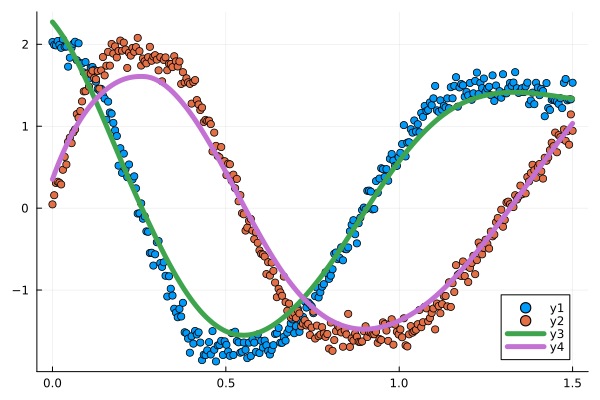

In [4]:
using ComponentArrays, Lux, DiffEqFlux, Optimization, OptimizationOptimisers,
      OrdinaryDiffEq, Plots

using Random
rng = Xoshiro(0)

u0 = Float32[2.0; 0.0]
datasize = 300
tspan = (0.0f0, 1.5f0)
tsteps = range(tspan[1], tspan[2]; length = datasize)

function trueODEfunc(du, u, p, t)
    true_A = [-0.1 2.0; -2.0 -0.1]
    du .= ((u .^ 3)'true_A)'
end

prob_trueode = ODEProblem(trueODEfunc, u0, tspan)
# println(prob_trueode)

# adding noise
data = Array(solve(prob_trueode, Tsit5(); saveat = tsteps)) .+ 0.1randn(2, 300)

du, u = collocate_data(data, tsteps, EpanechnikovKernel())

scatter(tsteps, data')
plot!(tsteps, u'; lw = 5)

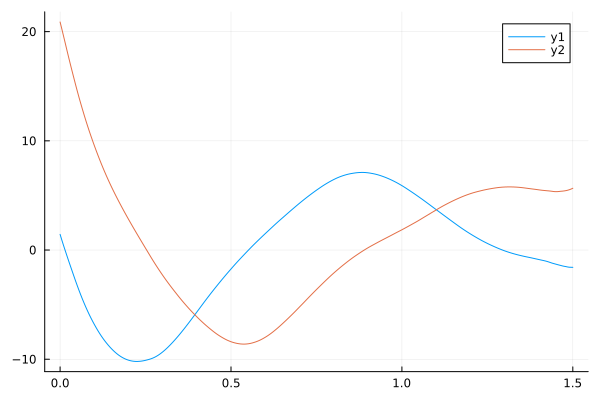

In [3]:
plot(tsteps, du')